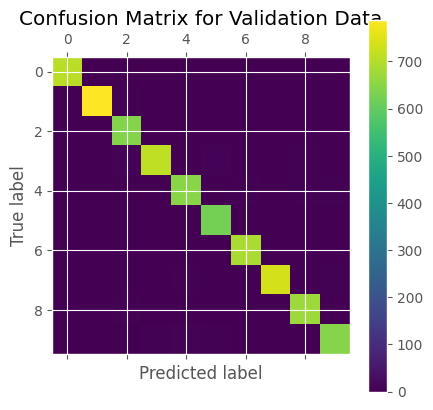


Showing some Test Images with Original and Predicted Labels...


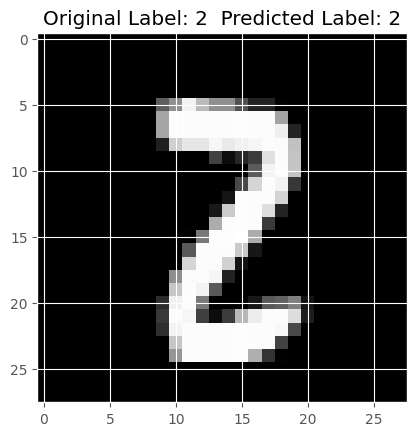

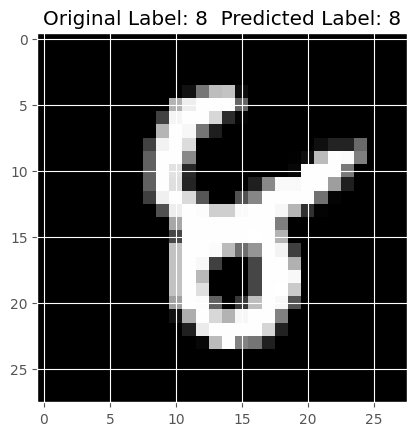

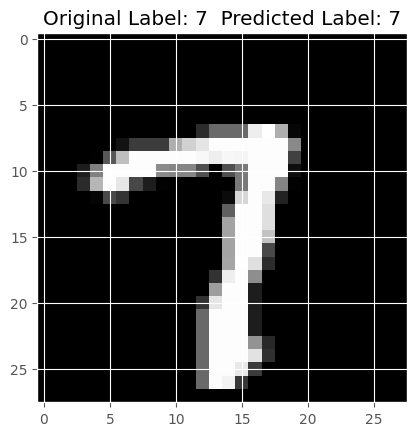

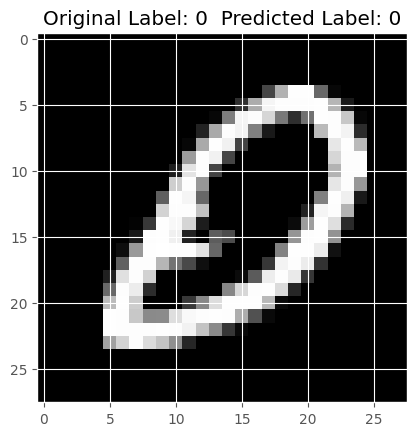

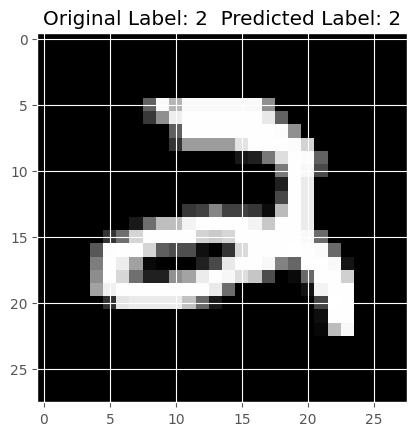

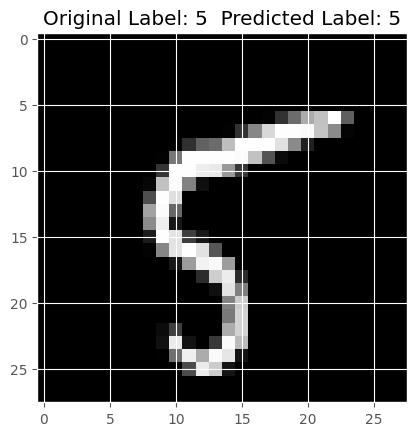

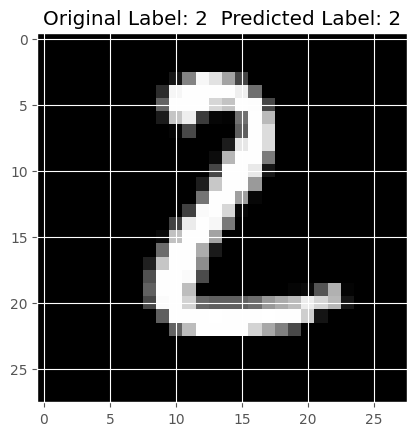

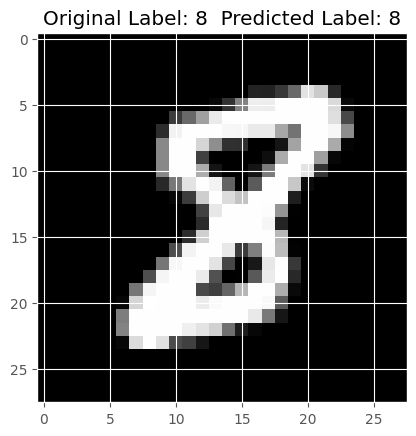

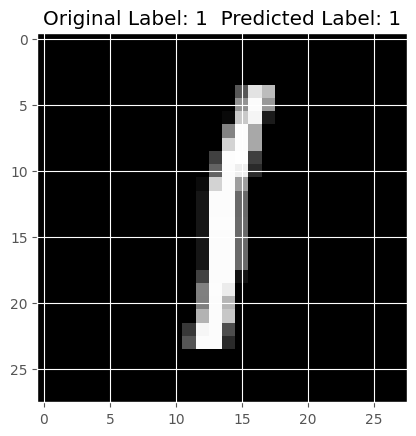

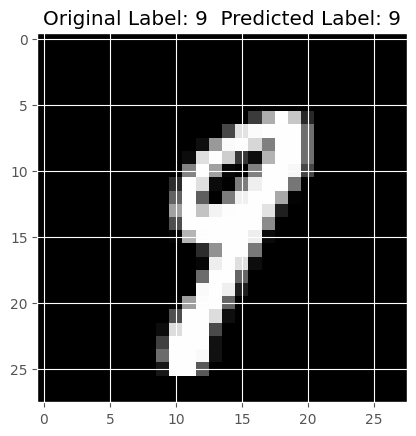

In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

# Load MNIST Data
print('\nLoading MNIST Data...')
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # Scale the features

# Features
X = np.array(X)
# Labels
y = np.array(y)

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
try:
    accuracy = accuracy_score(y_test, y_pred)
except KeyError as e:
    print(f"KeyError occurred while calculating accuracy_score: {e}")
    accuracy = None

print('\nCreating Confusion Matrix...')
try:
    conf_mat = confusion_matrix(y_test, y_pred)
except KeyError as e:
    print(f"KeyError occurred while creating confusion matrix: {e}")
    conf_mat = None

print('\nSVM Trained Classifier Accuracy: ', acc)
print('\nPredicted Values: ', y_pred)
if accuracy is not None:
    print('\nAccuracy of Classifier on Validation Images: ', accuracy)
else:
    print("Error occurred while calculating accuracy.")

if conf_mat is not None:
    print('\nConfusion Matrix: \n', conf_mat)
    # Plot Confusion Matrix Data as a Matrix
    plt.matshow(conf_mat)
    plt.title('Confusion Matrix for Validation Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
else:
    print("Error occurred while creating confusion matrix.")

# Restore stdout and close the log file
sys.stdout = old_stdout
log_file.close()

# Show some random Test Images with Original and Predicted Labels
print('\nShowing some Test Images with Original and Predicted Labels...')
a = np.random.randint(0, len(X_test), 10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], y_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()